In [1]:
import pandas as pd
import numpy as np
current_state = np.random.get_state()
np.random.set_state(current_state)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from scipy import stats
from scipy.stats import ttest_ind
import time 
import random

from collections import Counter
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, mean_squared_error, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from IPython.display import display
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error

from datetime import datetime
import plotly  as py
py.tools.set_credentials_file(username='mcmanusdatascience', api_key='Mkw1SmxGJj1HPglRqBES')
import plotly.graph_objs as go
import plotly.tools as tls

from numpy import concatenate

import warnings
warnings.filterwarnings("ignore")

import pandas_datareader.data as web
import datetime as dt
from datetime import date
import re
from sklearn import preprocessing
import scipy.stats  as stats
import matplotlib.pylab as pylab
from math import sqrt

In [2]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
#import data and 
atvi = pd.read_csv(r'C:\Users\Sean\Documents\Thinkful\Video Game Stocks Data\csv\atvi_master_final_2.csv')
atvi.Date = pd.to_datetime(atvi.Date)
atvi.index = atvi.Date

#split data for training and testing

train  = atvi.loc[:'2018-11-02']
test  = atvi.loc['2018-11-02':]

# Random Forest Classifer of Directional Change

In [4]:
#set up inputs and outputs for RF models
X_train = train[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]
X_test = test[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]

#set up yvariables 
#train
Y_train1 = pd.DataFrame()
Y_train1['nextdaydirectionchange'] = train['nextdaydirectionchange']
Y_train1['20daydirectionchange'] = train['20daydirectionchange']
Y_train1['15daydirectionchange'] = train['15daydirectionchange']
Y_train1['10daydirectionchange'] = train['10daydirectionchange']
Y_train1['5daydirectionchange'] = train['5daydirectionchange']
Y_train1['3daydirectionchange'] = train['3daydirectionchange']
#test
Y_test1 = pd.DataFrame()
Y_test1['nextdaydirectionchange'] = test['nextdaydirectionchange']
Y_test1['20daydirectionchange'] = test['20daydirectionchange']
Y_test1['15daydirectionchange'] = test['15daydirectionchange']
Y_test1['10daydirectionchange'] = test['10daydirectionchange']
Y_test1['5daydirectionchange'] = test['5daydirectionchange']
Y_test1['3daydirectionchange'] = test['3daydirectionchange']

#dataframes that contain all data
X_atvi = atvi[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]
Y_atvi = atvi['5daydirectionchange']

In [5]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate': 0.025}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train1['5daydirectionchange'])

predict_train = clf.predict(X_atvi)

#score

clf.score(X_atvi, Y_atvi)

0.7587336244541485

In [6]:
clf.score(X_test, Y_test1['5daydirectionchange'])

0.5256410256410257

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(1,7),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5)

random_grid.fit(X_train, Y_train1['5daydirectionchange'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6]), 'n_estimators': [500], 'min_samples_leaf': [10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
best_parameters=random_grid.best_estimator_.get_params()
print(best_parameters)
print(random_grid.best_score_)


#need to get statistical metrics for cross validations - check variance

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.5873850197109067


In [9]:
bestrandomclassifer = RandomForestClassifier(n_estimators=500, max_features=1, min_samples_leaf=100, bootstrap='True')

bestrandomclassifer.fit(X_train, Y_train1['5daydirectionchange'])

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
predict_train = bestrandomclassifer.predict(X_train)
predict_test = bestrandomclassifer.predict(X_test)

In [11]:
table_train = pd.crosstab(Y_train1['5daydirectionchange'], predict_train, margins=True)
print(table_train)

col_0                False  True  All
5daydirectionchange                  
False                   65   269  334
True                    37   390  427
All                    102   659  761


In [12]:
table_train = pd.crosstab(Y_test1['5daydirectionchange'], predict_test, margins=True)
print(table_train)

col_0                False  True  All
5daydirectionchange                  
False                   26    60   86
True                    14    56   70
All                     40   116  156


Model seems to be better at picking out Falses than Trues. In this sense, it could be used as a risk adverse model (if the it's flagging false don't buy - if it's flagging true maybe buy!)

In [13]:
bestrandomclassifer.score(X_test, Y_test1['5daydirectionchange'])

0.5256410256410257

In [14]:
#let properly cross validate the model and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi, cv=5)
print(scores)

[0.60326087 0.60869565 0.4863388  0.66666667 0.50549451]


In [15]:
scores.mean()

0.574091298342902

In [16]:
scores.std()

0.06785948032185415

We have some predictive utility here but there are limitations to using cross validation in this context. Specifically, we could be predicting the changes of past movements based on future data. Given that we are not including direct measures of stock price and only financial momentum indicators, the assumption that we are making here is that our feature variables provide meaningful impact on the outcome of choice independent of time. 

As a next step, let's investigate how the model performs 
Let's investigate how the model performs on predicting direction change over different time periods. 

In [17]:
#set up y variables for changes over different time periods.
Y_atvi_20 = atvi['20daydirectionchange']
Y_atvi_15 = atvi['15daydirectionchange']
Y_atvi_10 = atvi['10daydirectionchange']
Y_atvi_5 = atvi['5daydirectionchange']
Y_atvi_3 = atvi['3daydirectionchange']
Y_atvi_next = atvi['nextdaydirectionchange']

In [18]:
#let cross validate the model for the next day data and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi_next, cv=5)
scores.mean()

0.5325609173435261

In [19]:
#let cross validate the model for the 3 day data and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi_3, cv=5)
scores.mean()

0.5567060641900271

In [20]:
#let cross validate the model for the 5 day data and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi_5, cv=5)
scores.mean()

0.5708185494714362

In [21]:
#let cross validate the model for the 10 day data and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi_10, cv=5)
scores.mean()

0.571881290484284

In [22]:
#let cross validate the model for the 15 day data and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi_15, cv=5)
scores.mean()

0.6143493534263313

In [23]:
#let cross validate the model for the 5 day data and see how it performs
scores = cross_val_score(bestrandomclassifer, X_atvi, Y_atvi_20, cv=5)
scores.mean()

0.5707047169983734

# Confusion Matrices between models for varying timeframes.

The model seems to work bes ton predicting the changes 10  to 15 days out. Given that we have significant class imbalance this could be just a factor of the model learning to predict True in a manner that is effectively indiscriminant. Let's investigate the confusion matrices to establish if this is the case:

In [24]:
nextdayclassifer = RandomForestClassifier(n_estimators=1000, max_features=1, min_samples_leaf=100, bootstrap=True)

nextdayclassifer.fit(X_train, Y_train1['nextdaydirectionchange'])

nextdaypredictions = nextdayclassifer.predict(X_test)

In [25]:
next5dayclassifier = RandomForestClassifier(n_estimators=1000, max_features=1, min_samples_leaf=100, bootstrap=True)

next5dayclassifier.fit(X_train, atvi['5daydirectionchange'].loc[:'2018-11-02'])

next5daypredictions = next5dayclassifier.predict(X_test)

In [26]:
next15dayclassifier = RandomForestClassifier(n_estimators=1000, max_features=1, min_samples_leaf=100, bootstrap=True)

next15dayclassifier.fit(X_train, Y_train1['15daydirectionchange'])

next15daypredictions = next15dayclassifier.predict(X_test)

In [27]:
#create confusion matrices
nextdayaccuracyfornextday = pd.crosstab(nextdaypredictions, Y_test1['nextdaydirectionchange'], margins=True)
nextdayaccuracyfor5day = pd.crosstab(nextdaypredictions, Y_test1['5daydirectionchange'], margins=True)
nextdayaccuracyfor15day = pd.crosstab(nextdaypredictions, Y_test1['15daydirectionchange'], margins=True)

In [28]:
nextdayaccuracyfornextday

nextdaydirectionchange,False,True,All
row_0,,,
False,9,11,20
True,71,65,136
All,80,76,156


In [29]:
nextdayaccuracyfor5day

5daydirectionchange,False,True,All
row_0,,,
False,12,8,20
True,74,62,136
All,86,70,156


In [30]:
nextdayaccuracyfor15day

15daydirectionchange,False,True,All
row_0,,,
False,14,6,20
True,81,55,136
All,95,61,156


The model is not succeeding here at all. The cut off point we have used (Nov 2nd 2018) is proceeded by a large series of days where the stock price drops. Historically, this has not been typical behavior and the RF model is unable to predict this as currently constructed. Let's investigate how usable the models are on predicting across timeframes they were not trained on.

In [31]:
next5dayaccuracyfornextday = pd.crosstab(next5daypredictions, Y_test1['nextdaydirectionchange'], margins=True)
next5dayaccuracyfor5day = pd.crosstab(next5daypredictions, Y_test1['5daydirectionchange'], margins=True)
next5dayaccuracyfor15day = pd.crosstab(next5daypredictions, Y_test1['15daydirectionchange'], margins=True)

In [32]:
next5dayaccuracyfornextday

nextdaydirectionchange,False,True,All
row_0,,,
False,21,18,39
True,59,58,117
All,80,76,156


In [33]:
next5dayaccuracyfor5day

5daydirectionchange,False,True,All
row_0,,,
False,26,13,39
True,60,57,117
All,86,70,156


In [34]:
next5dayaccuracyfor15day

15daydirectionchange,False,True,All
row_0,,,
False,25,14,39
True,70,47,117
All,95,61,156


The results are similar to the previous results.

In [35]:
next15dayaccuracyfornextday = pd.crosstab(next15daypredictions, Y_test1['nextdaydirectionchange'], margins=True)
next15dayaccuracyfor5day = pd.crosstab(next15daypredictions, Y_test1['5daydirectionchange'], margins=True)
next15dayaccuracyfor15day = pd.crosstab(next15daypredictions, Y_test1['15daydirectionchange'], margins=True)

In [36]:
next15dayaccuracyfornextday 

nextdaydirectionchange,False,True,All
row_0,,,
False,19,18,37
True,61,58,119
All,80,76,156


In [37]:
next15dayaccuracyfor5day

5daydirectionchange,False,True,All
row_0,,,
False,25,12,37
True,61,58,119
All,86,70,156


In [38]:
next15dayaccuracyfor15day

15daydirectionchange,False,True,All
row_0,,,
False,24,13,37
True,71,48,119
All,95,61,156


It seems that in this context the model is simply not useful. It might be worth while to readjust the timeframe utilized and re-examine the results.

In [39]:
train  = atvi.loc[:'2018-05-25']
test  = atvi.loc['2018-05-25':'2018-11-02']

In [40]:
#set up inputs and outputs for RF models
X_train = train[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]
X_test = test[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]

#set up yvariables 
#train
Y_train1 = pd.DataFrame()
Y_train1['nextdaydirectionchange'] = train['nextdaydirectionchange']
Y_train1['20daydirectionchange'] = train['20daydirectionchange']
Y_train1['15daydirectionchange'] = train['15daydirectionchange']
Y_train1['10daydirectionchange'] = train['10daydirectionchange']
Y_train1['5daydirectionchange'] = train['5daydirectionchange']
Y_train1['3daydirectionchange'] = train['3daydirectionchange']
#test
Y_test1 = pd.DataFrame()
Y_test1['nextdaydirectionchange'] = test['nextdaydirectionchange']
Y_test1['20daydirectionchange'] = test['20daydirectionchange']
Y_test1['15daydirectionchange'] = test['15daydirectionchange']
Y_test1['10daydirectionchange'] = test['10daydirectionchange']
Y_test1['5daydirectionchange'] = test['5daydirectionchange']
Y_test1['3daydirectionchange'] = test['3daydirectionchange']

#dataframes that contain all data
X_atvi = atvi[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]
Y_atvi = atvi['5daydirectionchange']

In [41]:
nextdayclassifer = RandomForestClassifier(n_estimators=1000, max_features=1, min_samples_leaf=100, bootstrap=True)

nextdayclassifer.fit(X_train, Y_train1['nextdaydirectionchange'])

nextdaypredictions = nextdayclassifer.predict(X_test)

In [42]:
next5dayclassifier = RandomForestClassifier(n_estimators=1000, max_features=6, min_samples_leaf=1, bootstrap=True)

next5dayclassifier.fit(X_train, Y_train1['5daydirectionchange'])

next5daypredictions = next5dayclassifier.predict(X_test)

In [43]:
next15dayclassifier = RandomForestClassifier(n_estimators=1000, max_features=6, min_samples_leaf=1, bootstrap=True)

next15dayclassifier.fit(X_train, Y_train1['15daydirectionchange'])

next15daypredictions = next15dayclassifier.predict(X_test)

In [44]:
#create confusion matrices
nextdayaccuracyfornextday = pd.crosstab(nextdaypredictions, Y_test1['nextdaydirectionchange'], margins=True)
nextdayaccuracyfor5day = pd.crosstab(nextdaypredictions, Y_test1['5daydirectionchange'], margins=True)
nextdayaccuracyfor15day = pd.crosstab(nextdaypredictions, Y_test1['15daydirectionchange'], margins=True)

In [45]:
nextdayaccuracyfornextday

nextdaydirectionchange,False,True,All
row_0,,,
False,15,18,33
True,43,37,80
All,58,55,113


In [46]:
nextdayaccuracyfor5day

5daydirectionchange,False,True,All
row_0,,,
False,15,18,33
True,44,36,80
All,59,54,113


In [47]:
nextdayaccuracyfor15day

15daydirectionchange,False,True,All
row_0,,,
False,20,13,33
True,40,40,80
All,60,53,113


It's clear this model is not showing much generalizable utility. It is overfitting the general rising tide of the stock price. Let's adapt the model and see what utility Random Forest has a regression model.

# RF Regression

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(1,7),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5)

random_grid.fit(X_train, Y_train1['5daydirectionchange'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6]), 'n_estimators': [500], 'min_samples_leaf': [10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
train  = atvi.loc[:'2018-11-02']
test  = atvi.loc['2018-11-02':]

#set up inputs and outputs for RF models
X_train = train[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]
X_test = test[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]

#set up yvariables 
#train
Y_train1 = pd.DataFrame()
Y_train1['nextdaydirectionchange'] = train['nextdaydirectionchange']
Y_train1['20daydirectionchange'] = train['20daydirectionchange']
Y_train1['15daydirectionchange'] = train['15daydirectionchange']
Y_train1['10daydirectionchange'] = train['10daydirectionchange']
Y_train1['5daydirectionchange'] = train['5daydirectionchange']
Y_train1['3daydirectionchange'] = train['3daydirectionchange']
Y_train1['nextdayclose'] = train['nextdayclose']
Y_train1['3dayclose'] = train['3dayclose']
Y_train1['5dayclose'] = train['5dayclose']
#test
Y_test1 = pd.DataFrame()
Y_test1['nextdaydirectionchange'] = test['nextdaydirectionchange']
Y_test1['20daydirectionchange'] = test['20daydirectionchange']
Y_test1['15daydirectionchange'] = test['15daydirectionchange']
Y_test1['10daydirectionchange'] = test['10daydirectionchange']
Y_test1['5daydirectionchange'] = test['5daydirectionchange']
Y_test1['3daydirectionchange'] = test['3daydirectionchange']
Y_test1['nextdayclose'] = test['nextdayclose']
Y_test1['3dayclose'] = test['3dayclose']
Y_test1['5dayclose'] = test['5dayclose']
#dataframes that contain all data
X_atvi = atvi[['roc','williams_R','so','rsi','macd_val', '7day_peaks']]
Y_atvi = atvi['5daydirectionchange']

In [50]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

random_classifier = RandomForestRegressor()

parameters = { 'max_features':np.arange(1,7),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5)

random_grid.fit(X_train, Y_train1['nextdayclose'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6]), 'n_estimators': [500], 'min_samples_leaf': [10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
best_parameters=random_grid.best_estimator_.get_params()
print(best_parameters)
print(random_grid.best_score_)

#need to get statistical metrics for cross validations - check variance

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
-20.938238575329983


In [91]:
# run the rg model
bestrandomregressor = RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=50, bootstrap='True')

bestrandomregressor.fit(X_train, Y_train1['nextdayclose'])

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [92]:
# lets get the predictions from the RF models
predict_train = bestrandomregressor.predict(X_train)
predict_test = bestrandomregressor.predict(X_test)

In [93]:
bestrandomregressor.score(X_test, Y_test1['nextdayclose'])

-14.191418000062146

In [94]:
bestrandomregressor.score(X_train, Y_train1['nextdayclose'])

0.5684193344376633

In [95]:
#get predictions in y_test1 dataframe so we can plot the predictions against the actual results
Y_test1['nextdayprediction'] = predict_test
#predicted data needs to be shifted back to reflect that it's projecting 5 days into the future
Y_test1['nextdayprediction'] = Y_test1['nextdayprediction'].shift(+1)

trainingpredictions = pd.DataFrame(predict_train)
trainingpredictions['predicttraining'] = predict_train
trainingpredictions.index = pd.to_datetime(atvi['date'].loc['2015-10-28':'2018-11-03'])

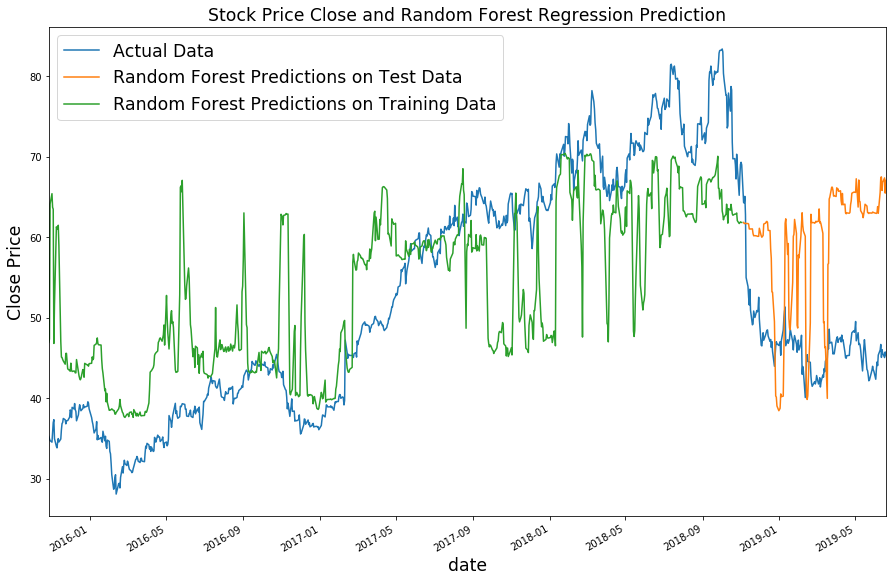

In [96]:
#let's plot our various ARIMA models
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction")
plt.ylabel("Close Price")
plt.legend()
plt.show()

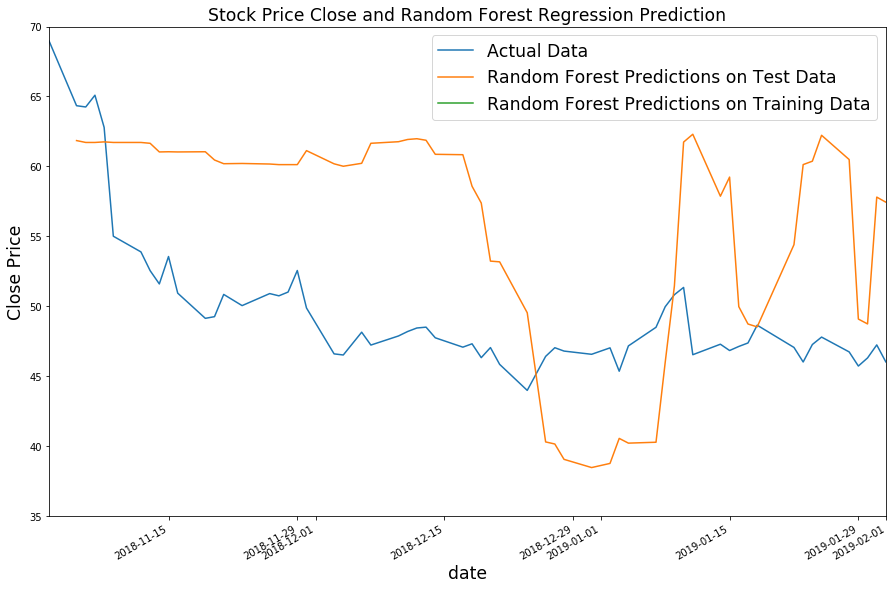

In [98]:
# lets zoom in to see what's going on
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2018-11-02','2019-02-1', 35, 70])
plt.show()

In [99]:
#model metric
rmse = sqrt(mean_squared_error(Y_test1['nextdayprediction'].loc['2018-11-05':'2019-06-19'], atvi['Close'].loc['2018-11-05':]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.154


The Random Forest Model seems to be catching some of the volatility and does a better job of representing this than the ARIMA model. Where it fails, and fails quite spectacularily is that it cannot pick up on the regular momentum or ebb and flow of the market and it over estimates large draw downs and also large spikes. This is likely occuring because of the stochastic nature of the stock price and also due to the nature of the Random Forest model and the data it is being trained. The model cannot distinguish between the fact that the stock price moved up quite noticeably in 2017. Accordingly, the data pre 2017 is over estimated and the data post 2017 is under estimated. 

There are two routes we can take to  rectify this issue:

 - Include the current day open or close as a feature variable in the model.
 - Construct a model that recursively adapts it's weighting and predictions based on the series of the data. An LSTM or other type of recurrent neural network would be a suitable approach.

In [100]:
X_train['open'] = train.Open
X_test['open'] = test.Open

In [101]:
bestrandomregressorwithcurrentopen = RandomForestRegressor(n_estimators=1000, max_features=7, min_samples_leaf=40, bootstrap='True')

bestrandomregressorwithcurrentopen.fit(X_train, Y_train1['nextdayclose'])

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=40,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [102]:
# get predictions from the model
predict_train_withopen = bestrandomregressorwithcurrentopen.predict(X_train)
predict_test_withopen = bestrandomregressorwithcurrentopen.predict(X_test)

In [103]:
bestrandomregressorwithcurrentopen.score(X_test, Y_test1['nextdayclose'])

0.6595071948602279

In [104]:
bestrandomregressorwithcurrentopen.score(X_train, Y_train1['nextdayclose'])

0.9848021477762091

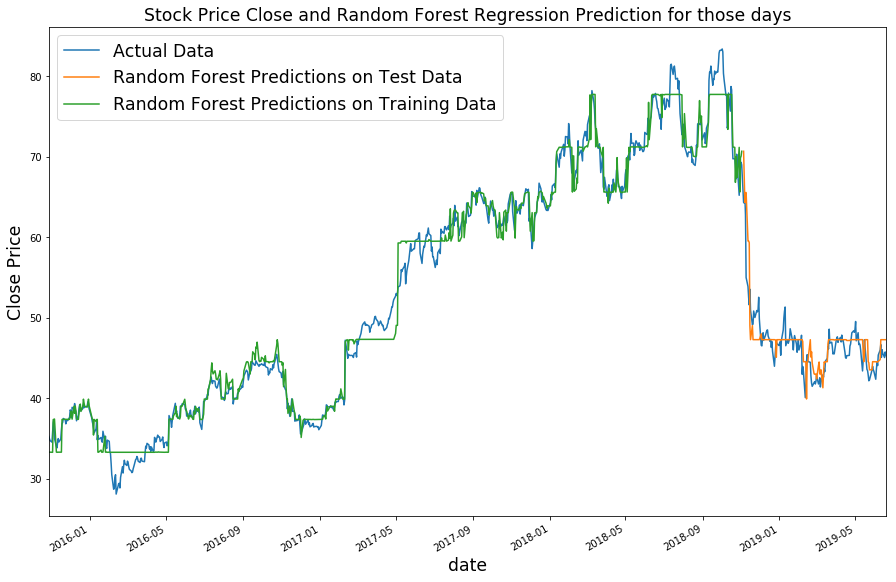

In [105]:
#get predictions in y_test1 dataframe so we can plot the predictions against the actual results
Y_test1['nextdayprediction'] = predict_test_withopen
#predicted data needs to be shifted back to reflect that it's projecting 5 days into the future
Y_test1['nextdayprediction'] = Y_test1['nextdayprediction'].shift(+1)

trainingpredictions = pd.DataFrame(predict_train_withopen)
trainingpredictions['predicttraining'] = predict_train_withopen
trainingpredictions.index = pd.to_datetime(atvi['date'].loc['2015-10-28':'2018-11-03'])

#let's plot our various predictions from the RF models
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for those days")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [106]:
#model metric
rmse = sqrt(mean_squared_error(Y_test1['nextdayprediction'].loc['2018-11-05':'2019-06-19'], atvi['Close'].loc['2018-11-05':]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.278


This is much better but it's still not there. The key here is whether the predicted downturns and upswings are in lockstep with each other. If they're this model has potential utility.

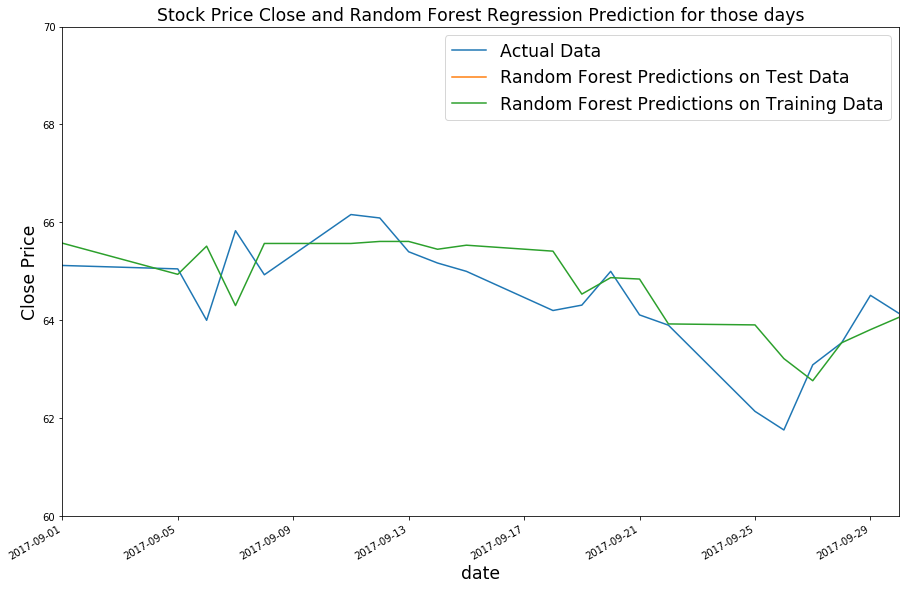

In [107]:
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for those days")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2017-09-01','2017-09-30', 60, 70])
plt.show()

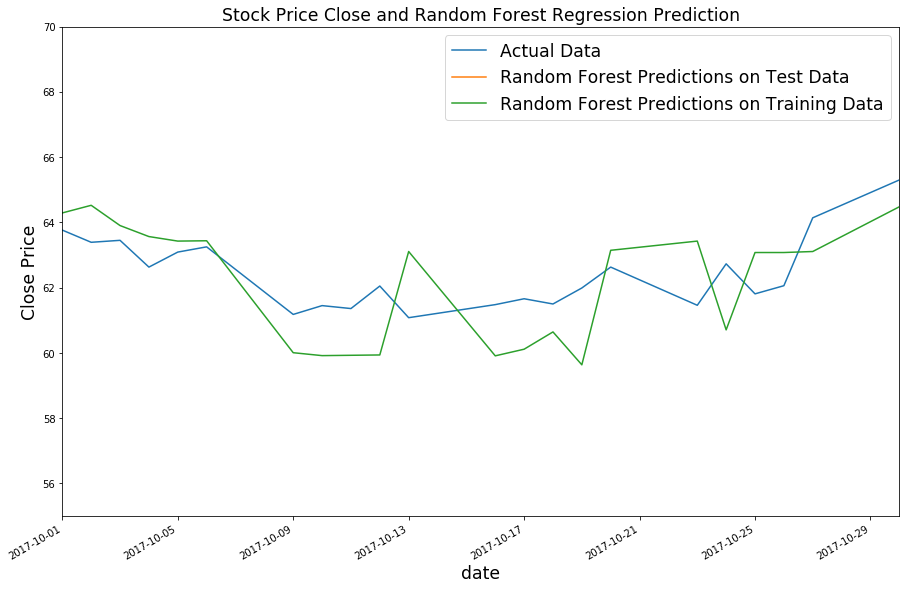

In [67]:
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for those days")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2017-10-01','2017-10-30', 55, 70])
plt.show()

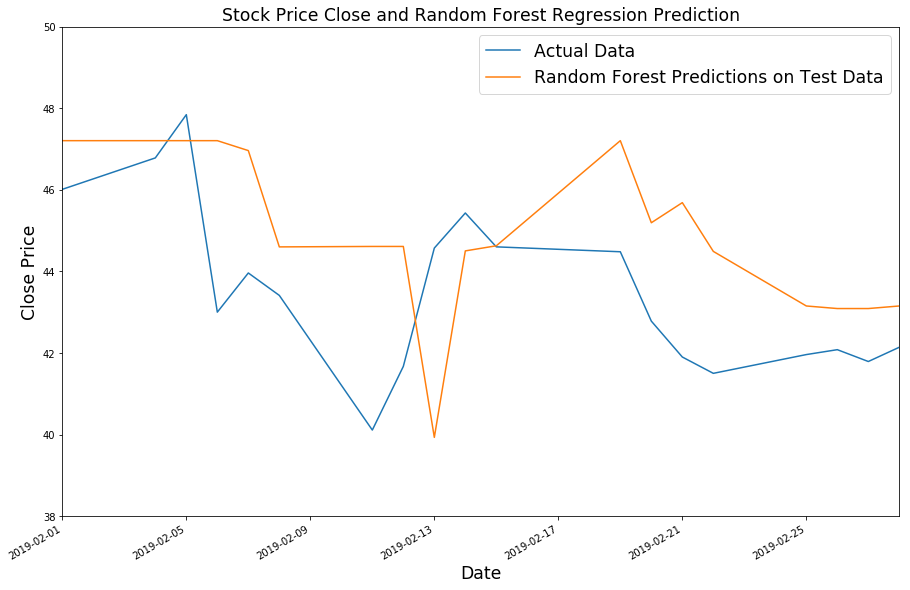

In [68]:
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for those days")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2019-02-01','2019-02-28', 38, 50])
plt.show()

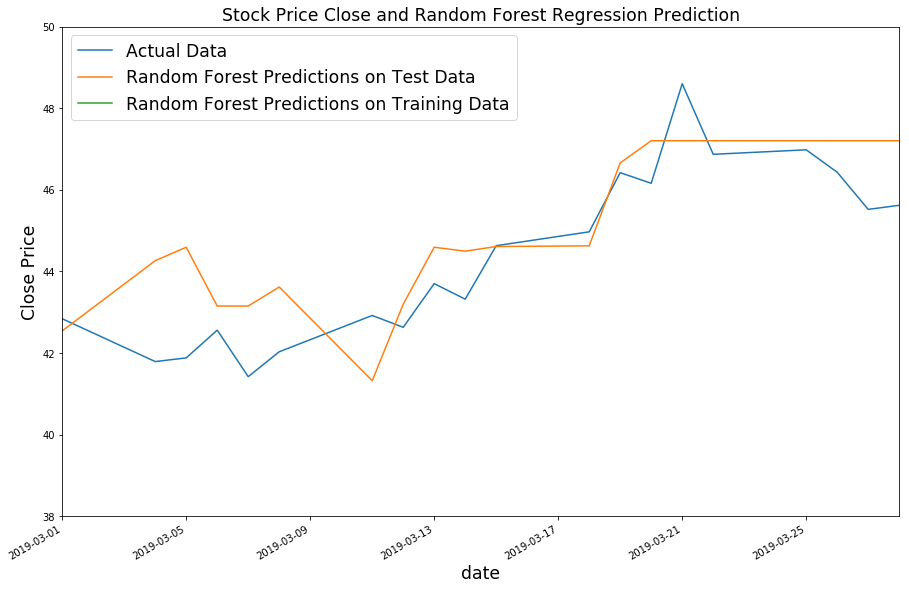

In [69]:
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for those days")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2019-03-01','2019-03-28', 38, 50])
plt.show()

The model is following the general trend but prediction wise, it's wrong as often as it is right. As a final iteration let's look at how the model predicts data 5 days out and with the daily low and high included.

It also seems that here the model is making a 1 day lagged prediction based on the inclusion of the prior day's open. This is a notable problem.

In [108]:
#since we're going 5 days out and we need to weigh the stock price more, let's include the current day lows and highs.
#this is reasonable as we have a sufficient timeframe now to act on our prediction
X_train['high'] = train.High
X_test['high'] = test.High

X_train['low'] = train.Low
X_test['low'] = test.Low

In [109]:
bestrandomregressor5dayout = RandomForestRegressor(n_estimators=1000, max_features=7, min_samples_leaf=40, bootstrap='True')

bestrandomregressor5dayout.fit(X_train, Y_train1['5dayclose'])

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=40,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [110]:
predict_train_5dayreg = bestrandomregressor5dayout.predict(X_train)
predict_test_5dayreg = bestrandomregressor5dayout.predict(X_test)

In [111]:
bestrandomregressor5dayout.score(X_test, Y_test1['nextdayclose'])

0.6859825594655625

In [112]:
bestrandomregressor5dayout.score(X_train, Y_train1['nextdayclose'])

0.9860618519372362

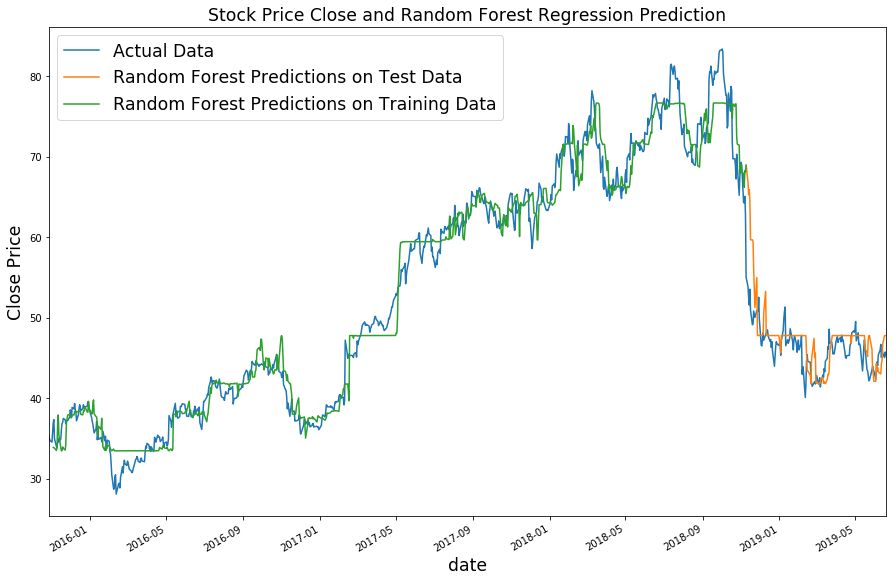

In [115]:
#get predictions in y_test1 dataframe so we can plot the predictions against the actual results
Y_test1['5dayprediction'] = predict_test_5dayreg
#predicted data needs to be shifted back to reflect that it's projecting 5 days into the future
Y_test1['5dayprediction'] = Y_test1['5dayprediction'].shift(+5)

trainingpredictions = pd.DataFrame(predict_train_5dayreg)
trainingpredictions['predicttraining'] = predict_train_5dayreg
trainingpredictions.index = pd.to_datetime(atvi['date'].loc['2015-11-04':'2018-11-09'])

#let's plot our various predictions from the RF models
atvi['Close'].plot(label='Actual Data')
Y_test1['5dayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction")
plt.ylabel("Close Price")
plt.legend()
plt.show()

This looks like it's actually predicting the drop quite well. Let's take a look at the predictions on the training data more closely.

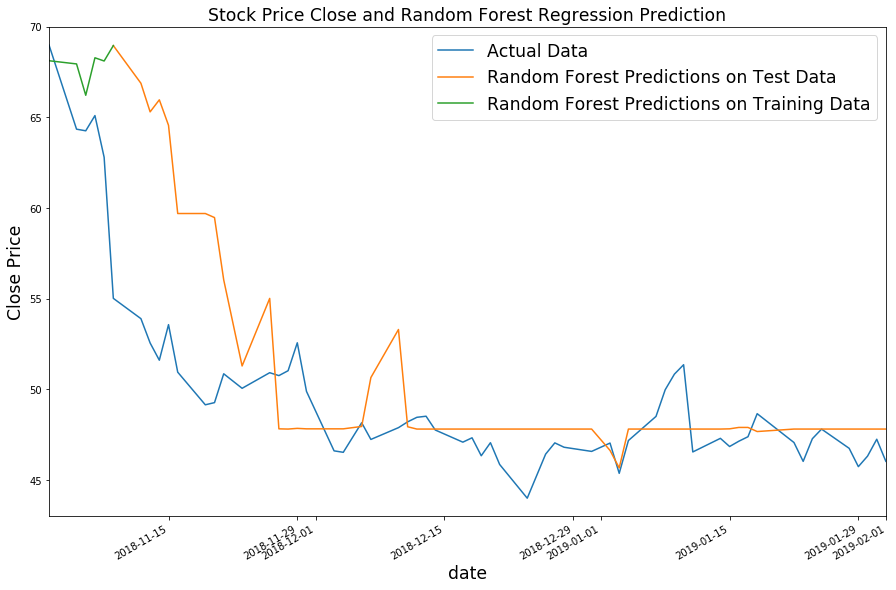

In [116]:
atvi['Close'].plot(label='Actual Data')
Y_test1['5dayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2018-11-02','2019-02-1', 43, 70])
plt.show()

The model does a seemingly phenomenal job of predicting the down turn in stock price. It strangely levels off for a long period of time. This levelling off is probably indicative of the fact that the model is predicting that the stock will remain range bound. Again, it seems to be shifting the current day's stock price out to 5 days in the future and this is a notable problem.

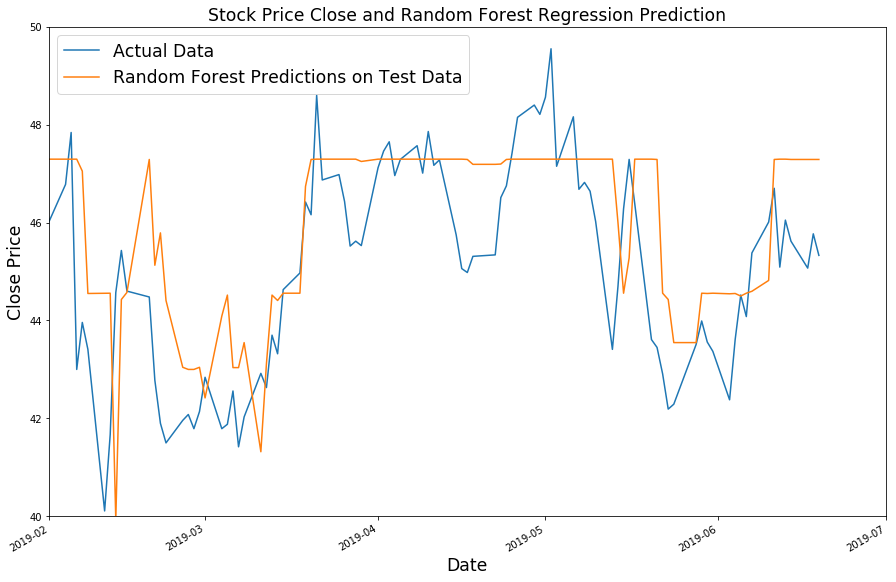

In [119]:
atvi['Close'].plot(label='Actual Data')
Y_test1['nextdayprediction'].plot(label= 'Random Forest Predictions on Test Data')
plt.title("Stock Price Close and Random Forest Regression Prediction")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2019-02-01','2019-07-1', 40, 50])
plt.show()

This model seems to be shifting the current day's stock price out to 5 days in the future. This model may have some utility in contributing to informing stock strategies for long term holdings, but is probably not sufficiently accurate to use as just a trading tool. Where this model may have utility if predicting large upswings or downturns after periods of relative stagnation in the stock price; An example of this is plotted below:

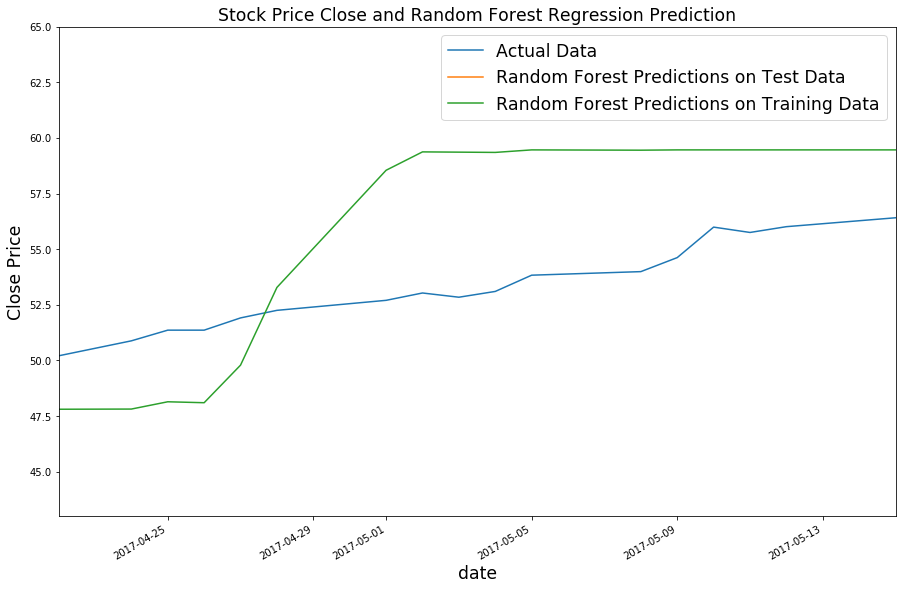

In [134]:
atvi['Close'].plot(label='Actual Data')
Y_test1['5dayprediction'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2017-04-22','2017-05-15', 43, 65])
plt.show()

In order to elucidate causality of our model, let's plot the data without shifting it:

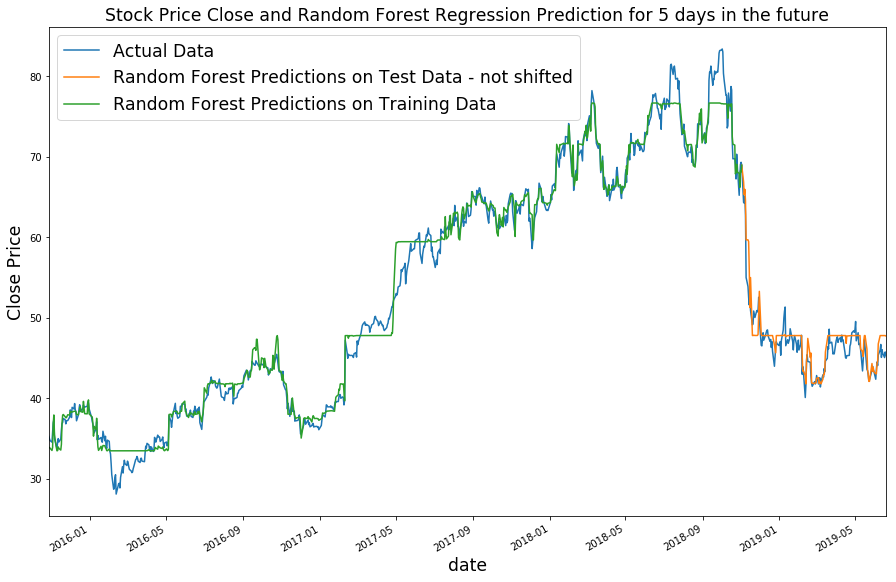

In [138]:
#get predictions in y_test1 dataframe so we can plot the predictions against the actual results
Y_test1['5dayprediction'] = predict_test_5dayreg
#predicted data needs to be shifted back to reflect that it's projecting 5 days into the future
Y_test1['5daypredictionnotshifted'] = Y_test1['5dayprediction']

trainingpredictions = pd.DataFrame(predict_train_5dayreg)
trainingpredictions['predicttraining'] = predict_train_5dayreg
trainingpredictions.index = pd.to_datetime(atvi['date'].loc['2015-10-28':'2018-11-02'])

#let's plot our various predictions from the RF models
atvi['Close'].plot(label='Actual Data')
Y_test1['5daypredictionnotshifted'].plot(label= 'Random Forest Predictions on Test Data - not shifted')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for 5 days in the future")
plt.ylabel("Close Price")
plt.legend()
plt.show()

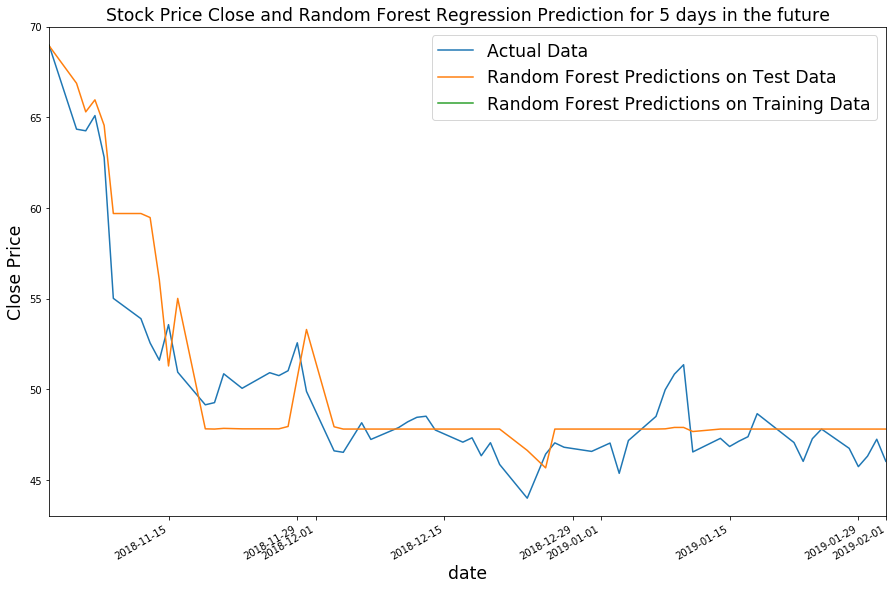

In [139]:
atvi['Close'].plot(label='Actual Data')
Y_test1['5daypredictionnotshifted'].plot(label= 'Random Forest Predictions on Test Data')
trainingpredictions['predicttraining'].plot( label= 'Random Forest Predictions on Training Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for 5 days in the future")
plt.ylabel("Close Price")
plt.legend()
plt.axis(['2018-11-02','2019-02-1', 43, 70])
plt.show()

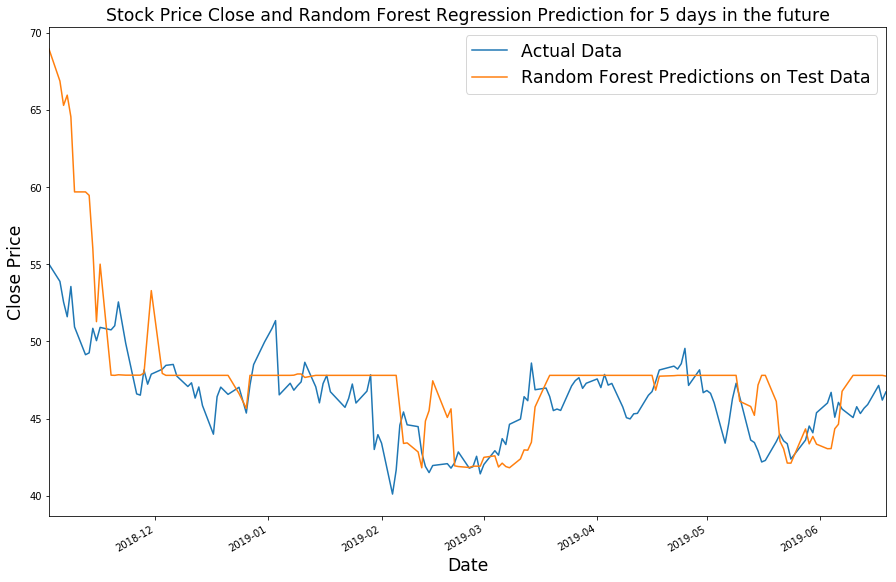

In [140]:
#get predictions in y_test1 dataframe so we can plot the predictions against the actual results
Y_test1['5dayprediction'] = predict_test_5dayreg
#predicted data needs to be shifted back to reflect that it's projecting 5 days into the future
Y_test1['5daypredictionnotshifted'] = Y_test1['5dayprediction']


#let's plot our various predictions from the RF models
Y_test1['5dayclose'].plot(label='Actual Data')
Y_test1['5daypredictionnotshifted'].plot(label= 'Random Forest Predictions on Test Data')
plt.title("Stock Price Close and Random Forest Regression Prediction for 5 days in the future")
plt.ylabel("Close Price")
plt.legend()
plt.show()

The model is just projecting the current day stock price out to the future. It looks great when plotted from afar, but on close inspection this model has not utility. In future it's imperative we do not display the current day stock price to the model. Using the current stock price mathematically encourages the model to forecast the current days price out to the future.